<a href="https://colab.research.google.com/github/ByoungChan-Park/PJ2_Group-of-BigData-Job-Turnover-Trend/blob/main/HR_datascientist_eda_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Data Description

- 1.1 해당 데이터 선정 이유
- 1.2 문제제기 방향
- 1.3 분석 목표

---


> ## 1.1 해당 데이터 선정 이유
- 본인이 데이터 분석가로 거듭나기 위한 선상에 놓여있기에, \
  데이터직종의 이직트렌드를 시사하기 적합하단 판단으로 데이터 선정 \
  
> - 대한민국에서의 데이터직군의 역사는 길지 않아 데이터 또한 많지 않았기에, \
데이터 산업의 근간이었던 미국의 데이터를 선정

  







> ## 1.2 문제제기 방향
- 이직성향이 어떤 특성으로 인해 좌우되는지 순위별로 확인

> - IT 직군에서의 이직은 도메인지식을 얻기 전까지는 빈번한 편에 속한다고 하는데, 단순 카더라가 아닌,\
  데이터적으로도 근속연차에 따라 이직률의 차이가 있는지 분석한다.

> - IT산업의 경우 신 산업분야중 하나이기에 대한민국의 판교처럼 업무환경이 인프라가 좋은곳인 경우가 많은데, 이는 보다 좋은인프라를 가진 도시로의 이직 희망율과 연관지을 수 있을 것 같다. 따라서 도시의 개발지수에 따라 이직희망율이 어떤지 분석한다.




> ## 1.3 분석 목표
- 데이터 직군 종사자들의 이직성향을 파악하여 예비 데이터직군 종사자들 및 채용을 계획중인 회사에 시사한다.





> #### *1) 라이브러리 설치*

In [1]:
#@title
# import sys
# if 'google.colab' in sys.modules:
#     #Install packages in Colab
#     # !pip3 install pandas==1.2
#     !pip3 install jinja2==3.0.3
#     !pip3 install h5py
#     !pip3 install typing-extensions
#     !pip3 install wheel
#     !pip3 install imgaug==0.2.5
#     !pip3 install eli5
#     # !pip3 install folium==0.2.1
#     !pip3 install pandas-profiling==2.*
#     !pip3 install pandas-profiling --trusted-host pypi.python.org --trusted-host files.pythonhosted.org --trusted-host pypi.org
#     !pip3 install pdpbox==0.2.0
#     !pip3 install shap
#     !apt -qq -y install fonts-nanum > /dev/null
#     !pip3 install impyute
#     !pip3 install missingpy
#     # !pip3 uninstall numpy
#     # !pip3 install numpy
#     # !pip install pandas --upgrade

> #### *2) 모듈 불러오기*

In [2]:
#@title

import sys

# To DataFrame
import pandas as pd
import numpy as np

# To Visualization
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
fm._rebuild()
plt.rc('font', family='NanumBarunGothic')
import plotly.express as px
import seaborn as sns
from pandas_profiling import ProfileReport
from pdpbox import pdp
import eli5
from eli5.sklearn import PermutationImportance

# To Preprocessing
import sklearn.neighbors._base
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
from missingpy import MissForest
from imblearn.over_sampling import SMOTE
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# To Encoding
from sklearn.preprocessing import LabelEncoder
# from sklearn.preprocessing import OneHotEncoder

# To Mechine Learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# 2. Data Exploration

- 2.1 Import Data from GoogleDrive
- 2.2 Introduce Column
- 2.3 Data Profiling(사전확인)

> ## 2.1 Import Data from GoogleDrive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df_raw = pd.read_csv('/content/drive/MyDrive/HR Analytics/HR_Analytics_DataJob.csv')

In [5]:
df = df_raw.copy()
df=df[['enrollee_id', 'gender', 'enrolled_university', 'education_level', 
            'major_discipline', 'training_hours', 'relevent_experience', 'experience', 
            'last_new_job', 'city', 'city_development_index', 'company_type', 'company_size', 'target']]
df.head(10)

,enrollee_id,gender,enrolled_university,education_level,major_discipline,training_hours,relevent_experience,experience,last_new_job,city,city_development_index,company_type,company_size,target
0,7041,Male,no_enrollment,Graduate,Humanities,65,Has relevent experience,<1,1,city_40,0.776,Pvt Ltd,1000-4999,0
1,29117,NaN,Full time course,Graduate,STEM,12,No relevent experience,<1,Never,city_11,0.550,NaN,NaN,0
2,30937,Female,Part time course,Graduate,STEM,83,No relevent experience,<1,2,city_57,0.866,Pvt Ltd,10/49,0
3,25290,NaN,no_enrollment,High School,NaN,29,Has relevent experience,<1,1,city_173,0.878,Pvt Ltd,100-500,0
4,10481,NaN,Full time course,Graduate,Business Degree,214,No relevent experience,<1,Never,city_102,0.804,NaN,NaN,0
5,24226,Female,no_enrollment,Graduate,STEM,13,Has relevent experience,<1,1,city_21,0.624,Pvt Ltd,50-99,0
6,17783,Male,Full time course,Graduate,STEM,11,Has relevent experience,<1,2,city_65,0.802,Pvt Ltd,10000+,0
7,17941,NaN,no_enrollment,Masters,Business Degree,18,No relevent experience,<1,1,city_21,0.624,Pvt Ltd,10000+,0
8,20653,Male,Full time course,Graduate,STEM,44,No relevent experience,<1,1,city_16,0.910,NaN,NaN,0
9,15297,NaN,Full time course,NaN,NaN,34,No relevent experience,<1,Never,city_103,0.920,NaN,NaN,0


## 2.2 Introduce Column
> ### **Surveyor**
  * **enrollee_id - 설문자 고유번호**<br>
  * **gender - 설문자 성별**<br>
    *('Male',　'Female',　'Other',　nan)*
  * **target - 이직희망여부**<br>
    *('0'_False,　'1'_True)*<br><br>

> ### **Knowledge**
  * **enrolled_university	- 대학 진학 과정**<br>
      *('Full time course',　'Part time course',　'no_enrollment',　nan)*
  * **education_level - 학위**<br>
    *('Phd',　'Masters',　'Graduate',　'High School',　'Primary School',　nan )*
  * **major_discipline - 전공**<br>
    *('STEM',　'Business Degree',　'Humanities',　'Arts',　'Other',　'No Major',　nan)*
  * **training_hours - 교육시간**<br>
    *(1~336_Continuous Data)*
  * **relevent_experience - 데이터직군 관련경험**<br>
    *('Has relevent experience',　'No relevent experience')*
  * **experience - 경력년수**<br>
    *(0~21_Continuous Data / nan)*
  * **last_new_job - 이전직장 근속년수**<br>
    *(0~4_Continuous Data / nan)*<br><br>

> ### **City**
  * **city - 도시 고유 번호**<br>
  * **city_development_index - 도시 개발 지수**<br>
    *(0.448~0.949_Continuous Data)*<br><br>

> ### **Company**
  * **company_type - 회사 유형**<br>
    *('Pvt Ltd',　'Funded Startup',　'Early Stage Startup',　'Public Sector',　'NGO',　'Other',　nan)*
  * **company_size - 사내 직원수**<br>
    *(<10,　10-49,　50-99,　100-500,　500-999,　1000-4999,　5000-9999,　10000<,　nan)*

---
 


> ## 2.2 Data Profiling
> ### Profiling Insight
- '**city**' column 은  도시의 고유명이기에 **High cardinality** 현상을 보인다.
- '**enrollee_id**' column 은 설문자의 고유명이기에 **Unique** 하다.
- '**target**' column 은 0과 1로 이루어진 형태이기에 0값의 비중이 높아 **Zeros** 현상을 보인다.
- 이외의 column 들은 결측치가 존재하여 **Missing** 문제가 식별된다.

In [6]:
profile = ProfileReport(df, minimal=True).to_notebook_iframe()

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# 3. Exploratory Data Analysis_(EDA)

- 3.1 Data Preview
- 3.2 Data Encoding
- 3.3 Data Preprocessing
- 3.4 Data Balancing





> ## 3.1 Data Preview
- 2.2 Data Profiling 에서 확인된 문제들을 시각화하여 확인하고, 전처리계획 수립


In [7]:
missing_value = 100 * df.isnull().sum()/len(df)
missing_value = missing_value.reset_index()
missing_value.columns = ['variables','missing values in percentage']
missing_value['missing values in percentage'] = missing_value['missing values in percentage'].round(2)

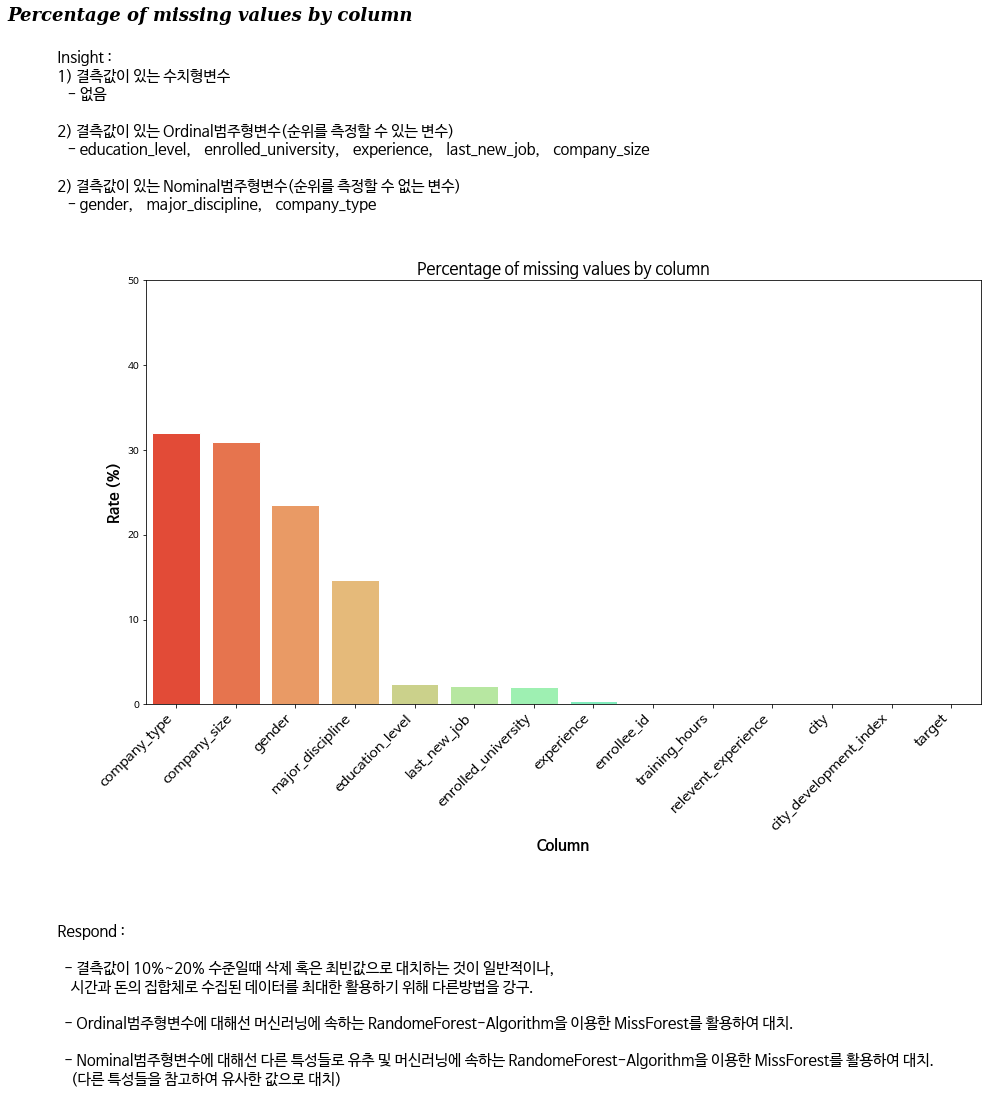

In [8]:
#그래프배경
fig, ax = plt.subplots(1, 1, figsize=(13.8, 18.4))
fig.subplots_adjust(left=0.06, bottom=0., right=0.9, top=0.32, wspace=0.2)
sns.set(style='whitegrid')

#그래프부문(barplot)
ax1 = sns.barplot(x='variables', y='missing values in percentage', 
                   data=missing_value.sort_values('missing values in percentage', ascending=False), palette='rainbow_r')
plt.ylim(0, 50.00)
plt.xlabel('Column', fontsize = 15, fontweight = 'bold')
plt.ylabel('Rate (%)', fontsize = 15, fontweight = 'bold')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45,
                  horizontalalignment='right',
                  fontweight='light',
                  fontsize='large'
                  )
plt.title('Percentage of missing values by column', size=16);


#그래프제목(네모칸)
fig.text(-0.08, 0.5,
         '''Percentage of missing values by column
         ''', 
        fontsize = 18, fontweight = 'bold', fontfamily = 'serif', color = 'black',
        bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10}, style = 'italic')

# 그래프 설명(네모칸 아래)
fig.text(-0.06, 0.36, 
         '''
         Insight :
         1) 결측값이 있는 수치형변수
            - 없음

         2) 결측값이 있는 Ordinal범주형변수(순위를 측정할 수 있는 변수)
            - education_level,　enrolled_university,　experience,　last_new_job,　company_size

         2) 결측값이 있는 Nominal범주형변수(순위를 측정할 수 없는 변수)
            - gender,　major_discipline,　company_type
         ''',
        fontsize = 15, fontweight = 'light', fontfamily = 'NanumBarunGothic', color = 'black')

# 그래프 설명(그래프 아래)
fig.text(-0.06, -0.3, 
         '''
         Respond :

           - 결측값이 10%~20% 수준일때 삭제 혹은 최빈값으로 대치하는 것이 일반적이나, 
             시간과 돈의 집합체로 수집된 데이터를 최대한 활용하기 위해 다른방법을 강구.

           - Ordinal범주형변수에 대해선 머신러닝에 속하는 RandomeForest-Algorithm을 이용한 MissForest를 활용하여 대치.

           - Nominal범주형변수에 대해선 다른 특성들로 유추 및 머신러닝에 속하는 RandomeForest-Algorithm을 이용한 MissForest를 활용하여 대치.
             (다른 특성들을 참고하여 유사한 값으로 대치)
         ''',
        fontsize = 15, fontweight = 'light', fontfamily = 'NanumBarunGothic', color = 'black')

plt.show();

> ## 3.2 Data Encoding
- 데이터 전처리 작업 이전 효율증대_(자연어 존재시 처리가 오래걸림) 및 KNN-Algorithm 적용을 위해 인코딩
- Label Encoder 사용시 순위를 인지하지 못하고 빈도에 따라 매핑되기 때문에, 수작업 실시

>> ### **3.2_1 Ordinal Categorical Variable Encoding**
  * 결측값 처리 이전 순위를 측정할 수 있는 변수들에 대하여 Mapping을 통한 Encoding


In [9]:
# Column name: education_level
# 초등학교졸업 : 0점 / 고등학교졸업 : 1점 / 학사 : 2점 / 석사 : 3점 / 박사 : 4점
education_level_map = {
    'Primary School' :    0,
    'High School'    :    1,
    'Graduate'       :    2,
    'Masters'        :    3, 
    'Phd'            :    4
    } 

# Column name: enrolled_university
# 미진학 : 0점 / 야간대학과정 : 1점 / 정규대학과정 : 2점
enrolled_university_map = {
    'no_enrollment'   :  0,
    'Part time course':    1, 
    'Full time course':    2 
}

# Column name: experience
# 경험년차가 높을수록 높은점수 부여
experience_map = {
    '<1'      :    0,
    '1'       :    1, 
    '2'       :    2, 
    '3'       :    3, 
    '4'       :    4, 
    '5'       :    5,
    '6'       :    6,
    '7'       :    7,
    '8'       :    8, 
    '9'       :    9, 
    '10'      :    10, 
    '11'      :    11,
    '12'      :    12,
    '13'      :    13, 
    '14'      :    14, 
    '15'      :    15, 
    '16'      :    16,
    '17'      :    17,
    '18'      :    18,
    '19'      :    19, 
    '20'      :    20, 
    '>20'     :    21
}

# Column name: last_new_job
# 이전직장에서 근속년수가 높을수록 높은점수 부여
last_new_job_map = {
    'Never'        :    0,
    '1'            :    1, 
    '2'            :    2, 
    '3'            :    3, 
    '4'            :    4, 
    '>4'           :    5
}

# Column name: company_size
# 회사규모(사원수)가 클수록 높은점수 부여
company_size_map = {
    '<10'          :    1,
    '10/49'        :    2, 
    '100-500'      :    3, 
    '1000-4999'    :    4, 
    '10000+'       :    5, 
    '50-99'        :    6, 
    '500-999'      :    7, 
    '5000-9999'    :    8
}

# Column name: relevent_experience
# boolean으로 분류할 수 있으나, 데이터직군 경험은 구직시 메리트로 적용됨으로 경험 여부를 차등화
# 경험없음 : 0점 / 경험있음 : 1점 
relevent_experience_map = {
    'Has relevent experience':  1,
    'No relevent experience':    0
}

In [10]:
# mapping
df_pre = df.copy()

df_pre.loc[:,'education_level'] = df['education_level'].map(education_level_map)
df_pre.loc[:,'enrolled_university'] = df['enrolled_university'].map(enrolled_university_map)
df_pre.loc[:,'experience'] = df['experience'].map(experience_map)
df_pre.loc[:,'last_new_job'] = df['last_new_job'].map(last_new_job_map)
df_pre.loc[:,'company_size'] = df['company_size'].map(company_size_map)
df_pre.loc[:,'relevent_experience'] = df['relevent_experience'].map(relevent_experience_map)

df_pre.head()

,enrollee_id,gender,enrolled_university,education_level,major_discipline,training_hours,relevent_experience,experience,last_new_job,city,city_development_index,company_type,company_size,target
0,7041,Male,0.0,2.0,Humanities,65,1,0.0,1.0,city_40,0.776,Pvt Ltd,4.0,0
1,29117,NaN,2.0,2.0,STEM,12,0,0.0,0.0,city_11,0.550,NaN,NaN,0
2,30937,Female,1.0,2.0,STEM,83,0,0.0,2.0,city_57,0.866,Pvt Ltd,2.0,0
3,25290,NaN,0.0,1.0,NaN,29,1,0.0,1.0,city_173,0.878,Pvt Ltd,3.0,0
4,10481,NaN,2.0,2.0,Business Degree,214,0,0.0,0.0,city_102,0.804,NaN,NaN,0


>> ### **3.2_2 Nominal Categorical Variable Encoding**
  * 우열을 가릴 수 없는 범주형 변수이기에 mapping값은 수치적의미가 아닌 코드화의 개념을 적용
  * 수치형 변수들과 구별하기 위해 음수값으로 표현

In [11]:
# Column name: gender
# 남성 : -1 / 여성 : -2 / 기타 : -3
gender_map = {
        'Male': -1,
        'FeMale': -2,
        'Other': -3
         }

# Column name: major_discipline
# 공학계열 : -1 / 경영학계열 : -2 / 인문학계열 : -3 / 예술계열 : -4 / 기타전공 : -5 / 비전공 : -6    
major_map ={ 
    'STEM'                   :    -1,
    'Business Degree'        :    -2, 
    'Humanities'             :    -3, 
    'Arts'                   :    -4, 
    'Other'                  :    -5, 
    'No Major'               :    -6 
}
    

# Column name: company_type
# 주식회사 : -1 / 투자형 스타트업 : -2 / 초기 스타트업 : -3 / 공기업 : -4 / 사회적기업 : -5 / 기타 : -6   
company_type_map = {
    'Pvt Ltd'               :    -1,
    'Funded Startup'        :    -2, 
    'Early Stage Startup'   :    -3, 
    'Public Sector'         :    -4, 
    'NGO'                   :    -5, 
    'Other'                 :    -6
}


In [12]:
company_type_map

{'Early Stage Startup': -3,
 'Funded Startup': -2,
 'NGO': -5,
 'Other': -6,
 'Public Sector': -4,
 'Pvt Ltd': -1}

In [13]:
# mapping
df_pre.loc[:,'company_type'] = df['company_type'].map(company_type_map)
df_pre.loc[:,'major_discipline'] = df['major_discipline'].map(major_map)
df_pre.loc[:,'gender'] = df['gender'].map(gender_map)

df_pre.head()

,enrollee_id,gender,enrolled_university,education_level,major_discipline,training_hours,relevent_experience,experience,last_new_job,city,city_development_index,company_type,company_size,target
0,7041,-1.0,0.0,2.0,-3.0,65,1,0.0,1.0,city_40,0.776,-1.0,4.0,0
1,29117,NaN,2.0,2.0,-1.0,12,0,0.0,0.0,city_11,0.550,NaN,NaN,0
2,30937,NaN,1.0,2.0,-1.0,83,0,0.0,2.0,city_57,0.866,-1.0,2.0,0
3,25290,NaN,0.0,1.0,NaN,29,1,0.0,1.0,city_173,0.878,-1.0,3.0,0
4,10481,NaN,2.0,2.0,-2.0,214,0,0.0,0.0,city_102,0.804,NaN,NaN,0


> ## 3.3 Data Preprocessing
- 3.3_1 Remove Outlier :  
결측치 대치 소요를 줄이기 위해 training_hours	column에 대한 이상치처리(삭제) 실시
- 3.3_2 Processing By Analogy With Another Feature :  
다른 특성으로 유추할 수 있는 결측치 대치
- 3.3_3 Can't Processing By Other Feature :  
다른 특성으로 유추할 수 없는 결측치 대치
- 3.3_4 Ordinal Categorical Variable Missing Value Processing :  
우열을 가릴 수 있는 범주형변수에 대해선 MICE를 활용하여 결측값 대치
- 3.3_5 Nominal Categorical Variable Missing Value Processing :  
우열을 가릴 수 없는 범주형변수에 대해선 MICE를 활용하여 결측값 대치

- 3.3_99999 Reshape :  
고유값인 enrollee_id를 인덱스로 활용

>> ### **3.3_1 Remove Outlier**
- 결측치 대치 소요를 줄이기 위해 training_hours	column에 대한 이상치처리(삭제) 실시

count    19158.000000
mean        65.366896
std         60.058462
min          1.000000
25%         23.000000
50%         47.000000
75%         88.000000
max        336.000000
Name: training_hours, dtype: float64

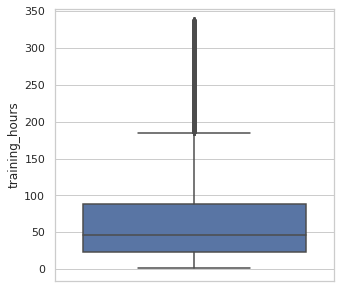

In [14]:
# 수치형 변수 중 연속형인 training_hours에 대한 이상치 확인 및 제거
plt.figure(figsize = (5,5))
sns.boxplot(y = 'training_hours', data = df_pre);
df_pre['training_hours'].describe()

In [15]:
def remove_outliers(dataframe, remove_col):
    df = dataframe
    k = remove_col
    level_1q = df[k].quantile(0.25) # 제1사분위수
    level_3q = df[k].quantile(0.75) # 제3사분위수
    IQR = level_3q - level_1q 
    rev_range = 1.5  # 제거 범위 조절 변수
    print("삭제될 데이터(%) : ", 
          (len(df) - len(df[(df[k] <= level_3q + (rev_range * IQR)) & (df[k] >= level_1q - (rev_range * IQR))])) / len(df_pre) * 100
          )
    print("기존 데이터 열 : ", len(df))
    df = df[(df[k] <= level_3q + (rev_range * IQR)) & (df[k] >= level_1q - (rev_range * IQR))]
    df = df.reset_index(drop=True)
    print("이상치 제거 후 데이터 열 :", len(df))
    return df

In [16]:
df_pre = remove_outliers(df_pre, 'training_hours')
df_pre.head()

삭제될 데이터(%) :  5.136235515189477
기존 데이터 열 :  19158
이상치 제거 후 데이터 열 : 18174


,enrollee_id,gender,enrolled_university,education_level,major_discipline,training_hours,relevent_experience,experience,last_new_job,city,city_development_index,company_type,company_size,target
0,7041,-1.0,0.0,2.0,-3.0,65,1,0.0,1.0,city_40,0.776,-1.0,4.0,0
1,29117,NaN,2.0,2.0,-1.0,12,0,0.0,0.0,city_11,0.550,NaN,NaN,0
2,30937,NaN,1.0,2.0,-1.0,83,0,0.0,2.0,city_57,0.866,-1.0,2.0,0
3,25290,NaN,0.0,1.0,NaN,29,1,0.0,1.0,city_173,0.878,-1.0,3.0,0
4,24226,NaN,0.0,2.0,-1.0,13,1,0.0,1.0,city_21,0.624,-1.0,6.0,0


>> ### **3.3_2 Processing By Analogy With Another Feature**
  * education_level(학력)이 고등학교 미만일 경우 일반적으로 major_discipline(전공)이 없다고 가정
  * company_size(회사규모), company_type(회사종류)가 둘다 'NaN' 일경우 미취업자로 판단  
  (major_discipline의 No Major이나 last_new_job column의 Never등  
  미표기에 대한 항목이 없어 결측치가 되었을 것이라 가정)


In [17]:
# To major_discipline 

# education_level(학력)을 통한 major_discipline(전공) 결측치 대체
# Encoding info : Primary School = 0, High School = 1
print("고등학교 졸업 이하 학력의 전공 : ",
      df_pre[df_pre['education_level'] < 2]['major_discipline'].unique()) # NaN값만 존재함을 확인

# 고등학교 이하의 학력을 가진 이들의 전공 결측값을 No Major로 대치
# Encoding info : No Major = -6
df_pre['major_discipline'] = df_pre['major_discipline'].fillna(-6)
print("대치 후 전공특성 구성 값 : ",df_pre['major_discipline'].unique())
print("전공특성 남은 결측치 : ", df_pre['major_discipline'].isna().sum())

고등학교 졸업 이하 학력의 전공 :  [nan]
대치 후 전공특성 구성 값 :  [-3. -1. -6. -2. -4. -5.]
전공특성 남은 결측치 :  0


In [18]:
# To company_size & company_type

# company_size(회사규모), company_type(회사종류)을 통해 결측치 대체
# company_size, company_type가 둘다 NaN일경우 미취업자로 판단

# 둘다 NaN인 경우의 데이터 수 = 5360
print("두 feature 모두 NaN : \n", df_pre[(df_pre['company_type'].isnull()) & (df_pre['company_size'].isnull())].shape[0])

# 하나만 NaN인 경우의 데이터 수 = 
print("한개 feature만 NaN : \n",
      (df_pre[(df_pre['company_type'].isnull()) | (df_pre['company_size'].isnull())].shape[0]) - (df_pre[(df_pre['company_type'].isnull()) & (df_pre['company_size'].isnull())].shape[0]))

# 두 특성 모두 한번에 제거해야하기 때문에 인덱스로 접근(index로 제거하지 않으면, 하나만 NaN인 경우의 데이터로 판별됨)
com_index = df_pre[(df_pre['company_type'].isnull()) & (df_pre['company_size'].isnull())].index.to_list()

# 제거
for i in com_index:
  df_pre.at[i, 'company_size'] = 0
  df_pre.at[i, 'company_type'] = 0

print("제거 후 한개 feature만 NaN : \n", df_pre[(df_pre['company_type'].isnull()) | (df_pre['company_size'].isnull())].shape[0])

# dictionary에 추가
company_size_map['No Job'] = 0
company_type_map['No Job'] = -7

두 feature 모두 NaN : 
 5099
한개 feature만 NaN : 
 1289
제거 후 한개 feature만 NaN : 
 1289


>> ### **3.3_3 Can't Processing By Other Feature**
- gender(성별)은 다른 feature로 알아낼 수 없기에, 결측치를 'No Data'로 대치

In [19]:
# Encoding info : 남성 : -1 / 여성 : -2 / 기타 : -3
df_pre['gender'].fillna(-4, inplace=True)

# dictionary에 추가
gender_map['No Data'] = -4

In [20]:
df_pre.isna().sum()

enrollee_id                 0
gender                      0
enrolled_university       365
education_level           431
major_discipline            0
training_hours              0
relevent_experience         0
experience                 59
last_new_job              410
city                        0
city_development_index      0
company_type              740
company_size              549
target                      0
dtype: int64

>> ### **3.3_4 Ordinal Categorical Variable Missing Value Processing**
- MissForest를 통해 순서형 범주데이터 결측값 제거
- 데이터 누수를 막기 위해 target 제외, 고유값 특성 제거(city),  
다른특성과 관계성이 없다고 판단된 특성 제거(gender), Nominal Data 특성 제거(company_type)
- *(experience,　enrolled_university,　last new job,　education level　company size 순 실시)*

---

In [21]:
df_pre.isna().sum().sort_values()

enrollee_id                 0
gender                      0
major_discipline            0
training_hours              0
relevent_experience         0
city                        0
city_development_index      0
target                      0
experience                 59
enrolled_university       365
last_new_job              410
education_level           431
company_size              549
company_type              740
dtype: int64

In [22]:
df_pre_MF = df_pre.copy()

In [23]:
df_pre_MF.drop(columns = ['target', 'city', 'gender', 'company_type'], inplace=True)

In [24]:
df_pre_MF['experience'] = df_pre_MF.experience.astype('category')
df_pre_MF['enrolled_university'] = df_pre_MF.enrolled_university.astype('category')
df_pre_MF['last_new_job'] = df_pre_MF.last_new_job.astype('category')
df_pre_MF['education_level'] = df_pre_MF.last_new_job.astype('category')
df_pre_MF['company_size'] = df_pre_MF.company_size.astype('category')


cat_cols = [df_pre_MF.columns.get_loc(col) for col in df_pre_MF.select_dtypes(['category']).columns.tolist()]
imputer = MissForest(random_state=42)
imputed = imputer.fit_transform(df_pre_MF, cat_vars=cat_cols)

imputed = pd.DataFrame(imputed, columns=df_pre_MF.columns.tolist())
for col in cat_cols:
    imputed.iloc[:,col] = imputed.iloc[:,col].astype('category')
df_pre_MF = imputed

Iteration: 0
Iteration: 1
Iteration: 2


In [25]:
df_pre_MF.head()

,enrollee_id,enrolled_university,education_level,major_discipline,training_hours,relevent_experience,experience,last_new_job,city_development_index,company_size
0,7041.0,0.0,1.0,-3.0,65.0,1.0,0.0,1.0,0.776,4.0
1,29117.0,2.0,0.0,-1.0,12.0,0.0,0.0,0.0,0.550,0.0
2,30937.0,1.0,2.0,-1.0,83.0,0.0,0.0,2.0,0.866,2.0
3,25290.0,0.0,1.0,-6.0,29.0,1.0,0.0,1.0,0.878,3.0
4,24226.0,0.0,1.0,-1.0,13.0,1.0,0.0,1.0,0.624,6.0


In [26]:
df_pre_MF.isna().sum()

enrollee_id               0
enrolled_university       0
education_level           0
major_discipline          0
training_hours            0
relevent_experience       0
experience                0
last_new_job              0
city_development_index    0
company_size              0
dtype: int64

>> ### **3.3_5 Nominal Categorical Variable Missing Value Processing**
- MissForest를 통해 순서형 범주데이터 결측값 제거
- 고의로 제거시켰던 Nominal Data 결측치 제거(company_type)

In [30]:
df_pre_MF = pd.concat([df_pre_MF, df_pre['company_type']], axis=1)

In [32]:
df_pre_MF.head()

,enrolled_university,education_level,major_discipline,training_hours,relevent_experience,experience,last_new_job,city_development_index,company_size,company_type
0,0.0,1.0,-3.0,65.0,1.0,0.0,1.0,0.776,4.0,-1.0
1,2.0,0.0,-1.0,12.0,0.0,0.0,0.0,0.550,0.0,0.0
2,1.0,2.0,-1.0,83.0,0.0,0.0,2.0,0.866,2.0,-1.0
3,0.0,1.0,-6.0,29.0,1.0,0.0,1.0,0.878,3.0,-1.0
4,0.0,1.0,-1.0,13.0,1.0,0.0,1.0,0.624,6.0,-1.0


>> ### **3.3_1 Reshape**
- 고유값인 enrollee_id를 인덱스로 활용

In [ ]:
# id는 고유의 수임이 확인 되었으므로 index로 사용하면 편할것으로 예상 / 아이디 순서대로 나열
df_pre = df_pre.sort_values('enrollee_id')
df_pre = df_pre.set_index('enrollee_id')
df_pre.head(-5)

# ***전처리 끝***

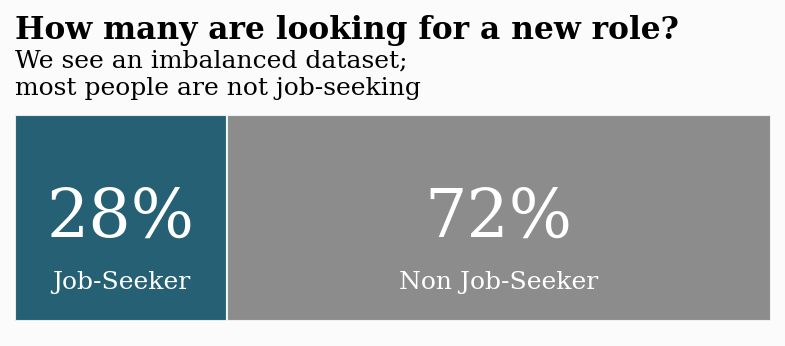

In [ ]:
x=train_df.groupby(['target'])['target'].count()
y=len(train_df)
r=((x/y)).round(2)
ratio = pd.DataFrame(r).T


fig, ax = plt.subplots(1,1,figsize=(6.5, 2),dpi=150)
background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color)
ax.set_facecolor(background_color) 

ax.barh(ratio.index, ratio[1.0], color='#0e4f66', alpha=0.9, ec=background_color, label='Job-Seeker')
ax.barh(ratio.index, ratio[0.0], left=ratio[1.0], color='gray', alpha=0.9,ec=background_color, label='Non Job-Seeker')

ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticks([])
ax.legend().set_visible(False)
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
    
for i in ratio.index:
    ax.annotate(f"{int(ratio[1.0][i]*100)}%", xy=(ratio[1.0][i]/2, i),va = 'center', ha='center',fontsize=32, fontweight='light', fontfamily='serif',color='white')
    ax.annotate("Job-Seeker", xy=(ratio[1.0][i]/2, -0.25),va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',color='white')
    
    
for i in ratio.index:
    ax.annotate(f"{int(ratio[0.0][i]*100)}%", xy=(ratio[1.0][i]+ratio[0.0][i]/2, i),va = 'center', ha='center',fontsize=32, fontweight='light', fontfamily='serif',color='white')
    ax.annotate("Non Job-Seeker", xy=(ratio[1.0][i]+ratio[0.0][i]/2, -0.25),va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',color='white')


fig.text(0.125,1.1,'How many are looking for a new role?', fontfamily='serif',fontsize=15, fontweight='bold')
fig.text(0.125,0.915,'We see an imbalanced dataset;\nmost people are not job-seeking',fontfamily='serif',fontsize=12)  


plt.show()

In [ ]:
aug_train = train_df.copy()

In [ ]:
# I like to keep categorical data where I can, as perhaps the fact that we do not have a company size or the company type
# could actually tell us something.


aug_train['last_new_job'] = aug_train['last_new_job'].apply(lambda x: 'Never' if x == 'never' else x) #just reads nicer
aug_train['enrolled_university'][aug_train['enrolled_university'] == 'no_enrollment'] = 'No Enrollment' #just reads nicer
aug_train['company_size'] = aug_train['company_size'].apply(lambda x: '10-49' if x == '10/49' else x) #diff replacement method

aug_train['experience'] = aug_train['experience'].apply(lambda x: '0' if x == '<1' else x)
aug_train['experience'] = aug_train['experience'].apply(lambda x: '20' if x == '>20' else x)


aug_train['company_size'].fillna('0',inplace=True)
aug_train['company_type'].fillna('Unknown',inplace=True)
aug_train['major_discipline'].fillna('Unknown',inplace=True)
aug_train['gender'].fillna('Not provided',inplace=True)

# This is what I mean with respect to the gender categories:

aug_train['target'].groupby(aug_train['gender']).mean()

gender
Female          0.299677
Male            0.251948
Not provided    0.346939
Other           0.293194
Name: target, dtype: float64

In [ ]:
aug_train.dropna(inplace=True)
aug_train.isna().sum()/len(aug_train)

enrollee_id               0.0
gender                    0.0
enrolled_university       0.0
education_level           0.0
major_discipline          0.0
training_hours            0.0
relevent_experience       0.0
experience                0.0
last_new_job              0.0
city                      0.0
city_development_index    0.0
company_type              0.0
company_size              0.0
target                    0.0
count                     0.0
dtype: float64

In [ ]:
 aug_train.groupby(['education_level','last_new_job'])['experience'].sum().unstack().loc[ed_order,job_order]

KeyError: ignored

In [ ]:
aug_train['last_new_job'].unique()

array(['1', '<1', '2', '3', '>4', '4'], dtype=object)

In [ ]:
aug_train['experience'] = aug_train['experience'].astype(str).astype(int)

aug_train['training_hours'] = aug_train['training_hours'].astype(str).astype(int)

In [ ]:
ed_order = ['Primary School','High School','Graduate','Masters','Phd']
enroll_order = ['No Enrollment','Part time course','Full time course']
disc_order = ['STEM','Unknown','Humanities','Other','Business Degree','Arts','No Major']
exp_yrs_order = ['<1','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','>20']
exp_yrs_order_2 = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
size_order = ['0','<10', '10-49', '50-99', '100-500', '500-999', '1000-4999', '5000-9999', '10000+']
job_order = ['<1', '1', '2', '3', '4', '>4']
exp_order =['No relevant experience','Has relevant experience']
gender_order = ['Male','Female','Other','Not provided']
company_order = ['Pvt Ltd','Unknown','Funded Startup','Public Sector','Early Stage Startup','NGO','Other']

NameError: ignored

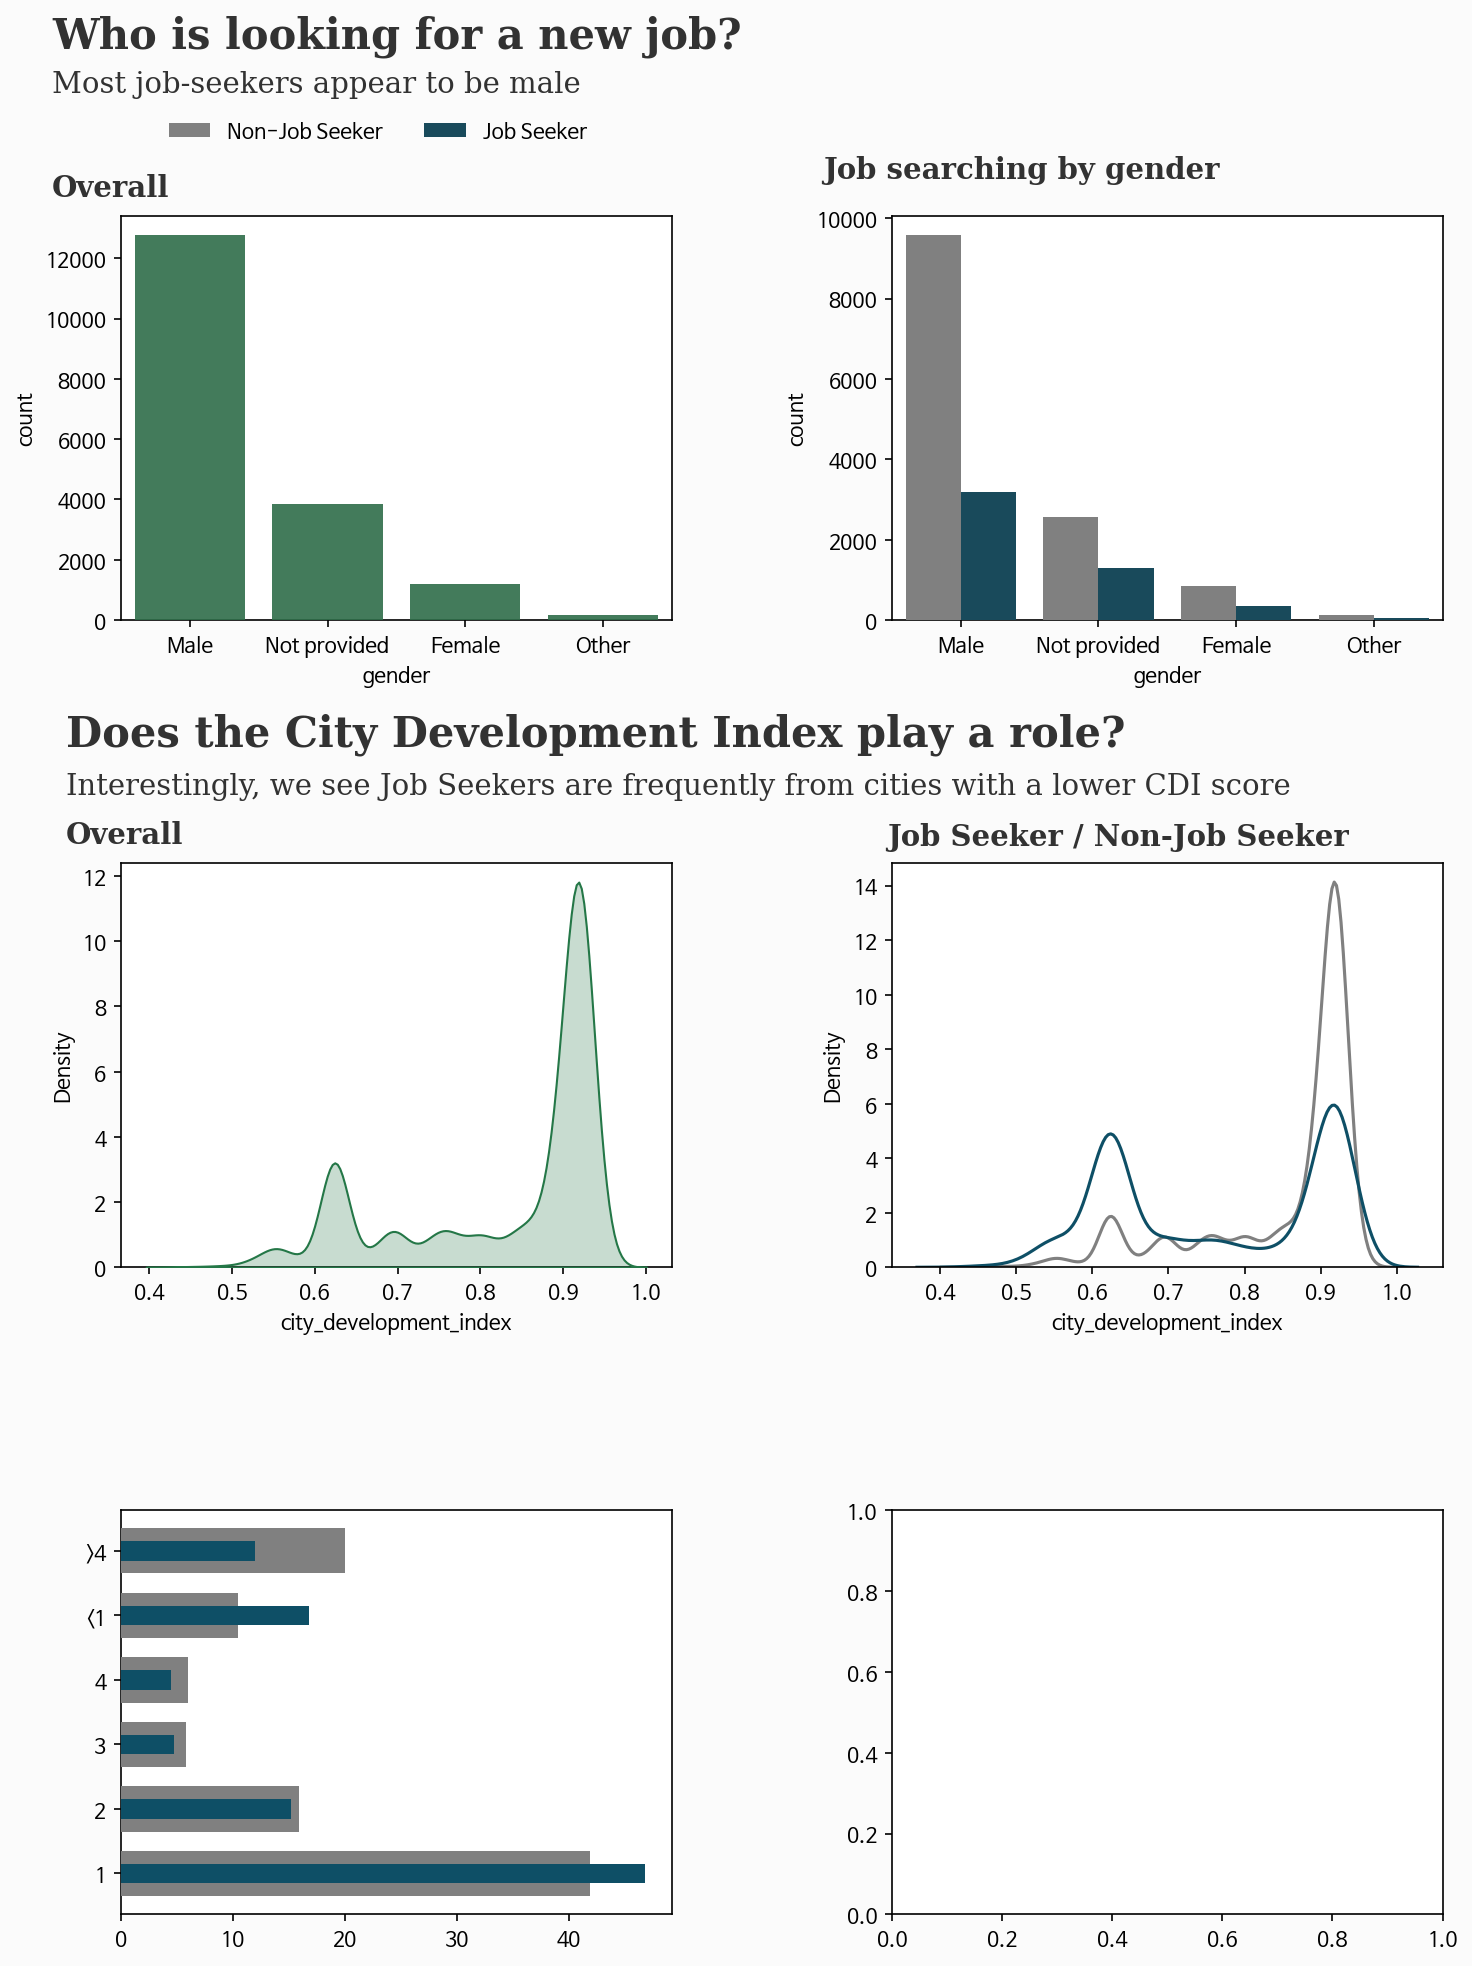

In [ ]:
color_palette=["gray","#0e4f66"]
fig = plt.figure(figsize=(18,15), dpi=150)
fig.patch.set_facecolor(background_color) # figure background color
gs = fig.add_gridspec(3, 3)
gs.update(wspace=0.4, hspace=0.6)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])
ax4 = fig.add_subplot(gs[2, 0])
ax5 = fig.add_subplot(gs[2, 1])

# Distribution
ax0.text(-1, 19000, 'Who is looking for a new job?', fontsize=20, fontweight='bold', fontfamily='serif', color="#323232")
ax0.text(-1, 17500, 'Most job-seekers appear to be male', fontsize=14, fontweight='light', fontfamily='serif', color="#323232")
ax0.text(-1, 14050, 'Overall', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
sns.countplot(x=aug_train["gender"], color="#247747", ax=ax0, zorder=3,alpha=0.9)



# Gender
ax1.text(-1, 11000, 'Job searching by gender', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
sns.countplot(x="gender", hue="target", data=aug_train, palette=color_palette, ax=ax1, zorder=3)
legend_labels, _= ax1.get_legend_handles_labels()
ax1.legend(legend_labels, ["Non-Job Seeker", "Job Seeker"], ncol=2, bbox_to_anchor=(-0.52, 1.28), facecolor=background_color, edgecolor=background_color)



# CDI
ax2.text(0.3, 16, 'Does the City Development Index play a role?', fontsize=20, fontweight='bold', fontfamily='serif', color="#323232")
ax2.text(0.3, 14.5, 'Interestingly, we see Job Seekers are frequently from cities with a lower CDI score', fontsize=14, fontweight='light', fontfamily='serif', color="#323232")
ax2.text(0.3, 13, 'Overall', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
sns.kdeplot(aug_train["city_development_index"], color="#247747", shade=True, ax=ax2, zorder=3)



ax3.text(0.33, 15.5, 'Job Seeker / Non-Job Seeker', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
sns.kdeplot(aug_train.loc[(aug_train["target"]==0), "city_development_index"], color="gray", label="Not Survived", ax=ax3)
sns.kdeplot(aug_train.loc[(aug_train["target"]==1), "city_development_index"], color="#0e4f66", label="Survived", ax=ax3)



###
aug_train['count'] = 1
job_hunt_only = aug_train[aug_train['target']==1]
no_job_hunt_only = aug_train[aug_train['target']==0]

job_change = aug_train.groupby(['education_level','last_new_job'])['experience'].sum().unstack().loc[ed_order,job_order]

job_hunt_only.groupby(['target','last_new_job'])['count'].sum().unstack()
notseek_job_change = no_job_hunt_only.groupby(['target','last_new_job'])['count'].sum().unstack().T
seek_job_change = job_hunt_only.groupby(['target','last_new_job'])['count'].sum().unstack().T

notseek_job_change.columns = ['count']
seek_job_change.columns = ['count']

notseek_job_change["percentage"] = notseek_job_change["count"].apply(lambda x: x/sum(notseek_job_change["count"])) *100
seek_job_change["percentage"] = seek_job_change["count"].apply(lambda x: x/sum(seek_job_change["count"])) *100


ed_notseek_job_change = no_job_hunt_only.groupby(['target','education_level'])['count'].sum().unstack().T.loc[ed_order]
ed_seek_job_change = job_hunt_only.groupby(['target','education_level'])['count'].sum().unstack().T.loc[ed_order]

ed_notseek_job_change.columns = ['count']
ed_seek_job_change.columns = ['count']

ed_notseek_job_change["percentage"] = ed_notseek_job_change["count"].apply(lambda x: x/sum(ed_notseek_job_change["count"])) *100
ed_seek_job_change["percentage"] = ed_seek_job_change["count"].apply(lambda x: x/sum(ed_seek_job_change["count"])) *100

###


ax4.barh(notseek_job_change.index, notseek_job_change['percentage'], color="gray", zorder=3, height=0.7)
ax4.barh(seek_job_change.index, seek_job_change['percentage'], color="#0e4f66", zorder=3, height=0.3)
ax4.xaxis.set_major_locator(mtick.MultipleLocator(10))


##
ax5.barh(ed_notseek_job_change.index, ed_notseek_job_change['percentage'], color="gray", zorder=3, height=0.7)
ax5.barh(ed_seek_job_change.index, ed_seek_job_change['percentage'], color="#0e4f66", zorder=3, height=0.3)
ax5.xaxis.set_major_locator(mtick.MultipleLocator(10))

##
ax4.text(-1, 5.7, 'Last job change (yrs)',fontsize=15, fontweight='bold', fontfamily='serif',color='#323232')
ax5.text(0, 4.55, 'Education level', fontsize=15, fontweight='bold', fontfamily='serif',color='#323232')

ax4.text(-2.5, 7.5, 'Are there other differences?', 
         fontsize=20, fontweight='bold', fontfamily='serif',color='#323232')

ax4.text(-2.5, 6.75, 
         'We see broadly similar patterns, but notable areas of difference', 
         fontsize=14, fontweight='light', fontfamily='serif')


####

fig.text(0.77, 0.89
         , 'Insight', fontsize=15, fontweight='bold', fontfamily='serif',color='#323232')

fig.text(0.77, 0.39, '''
We note that most job-seekers are Male.
This is not all that surprising as in this
dataset Males make up the majority of the
sample population.

What is more interesting though is
the City Development Index (CDI) chart.
There we see that there are two peaks
for job-seekers. 
The peaks are at high and low CDI scores. 


We can ponder why this might be;
in high CDI areas perhaps there are a 
lot of opportunities and therefore
people feel encouraged to seek better roles.


Perhaps in lower CDI areas candidates
want to improve their circumstances by
searching for new jobs, maybe in new areas. 


This is all conjecture, but interesting
nonetheless.

It is also interesting to see that job-seekers
have changed job more often that non-job seekers
within that past 1 year, and also
those that have never looked for a job
also seem to be ready for a new
challenge.
'''
         , fontsize=14, fontweight='light', fontfamily='serif',color='#323232')



import matplotlib.lines as lines
l1 = lines.Line2D([0.7, 0.7], [0.1, 0.9], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])

for s in ["top","right","left"]:
    for i in range(0,6):
        locals()["ax"+str(i)].spines[s].set_visible(False)
        
for i in range(0,6):
        locals()["ax"+str(i)].set_facecolor(background_color)
        locals()["ax"+str(i)].tick_params(axis=u'both', which=u'both',length=0)
        locals()["ax"+str(i)].grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))      

        
for x in range(0,4):
    for y in range(0,4):
        locals()["ax"+str(x)].set_xlabel("")
        locals()["ax"+str(y)].set_ylabel("")

plt.show()

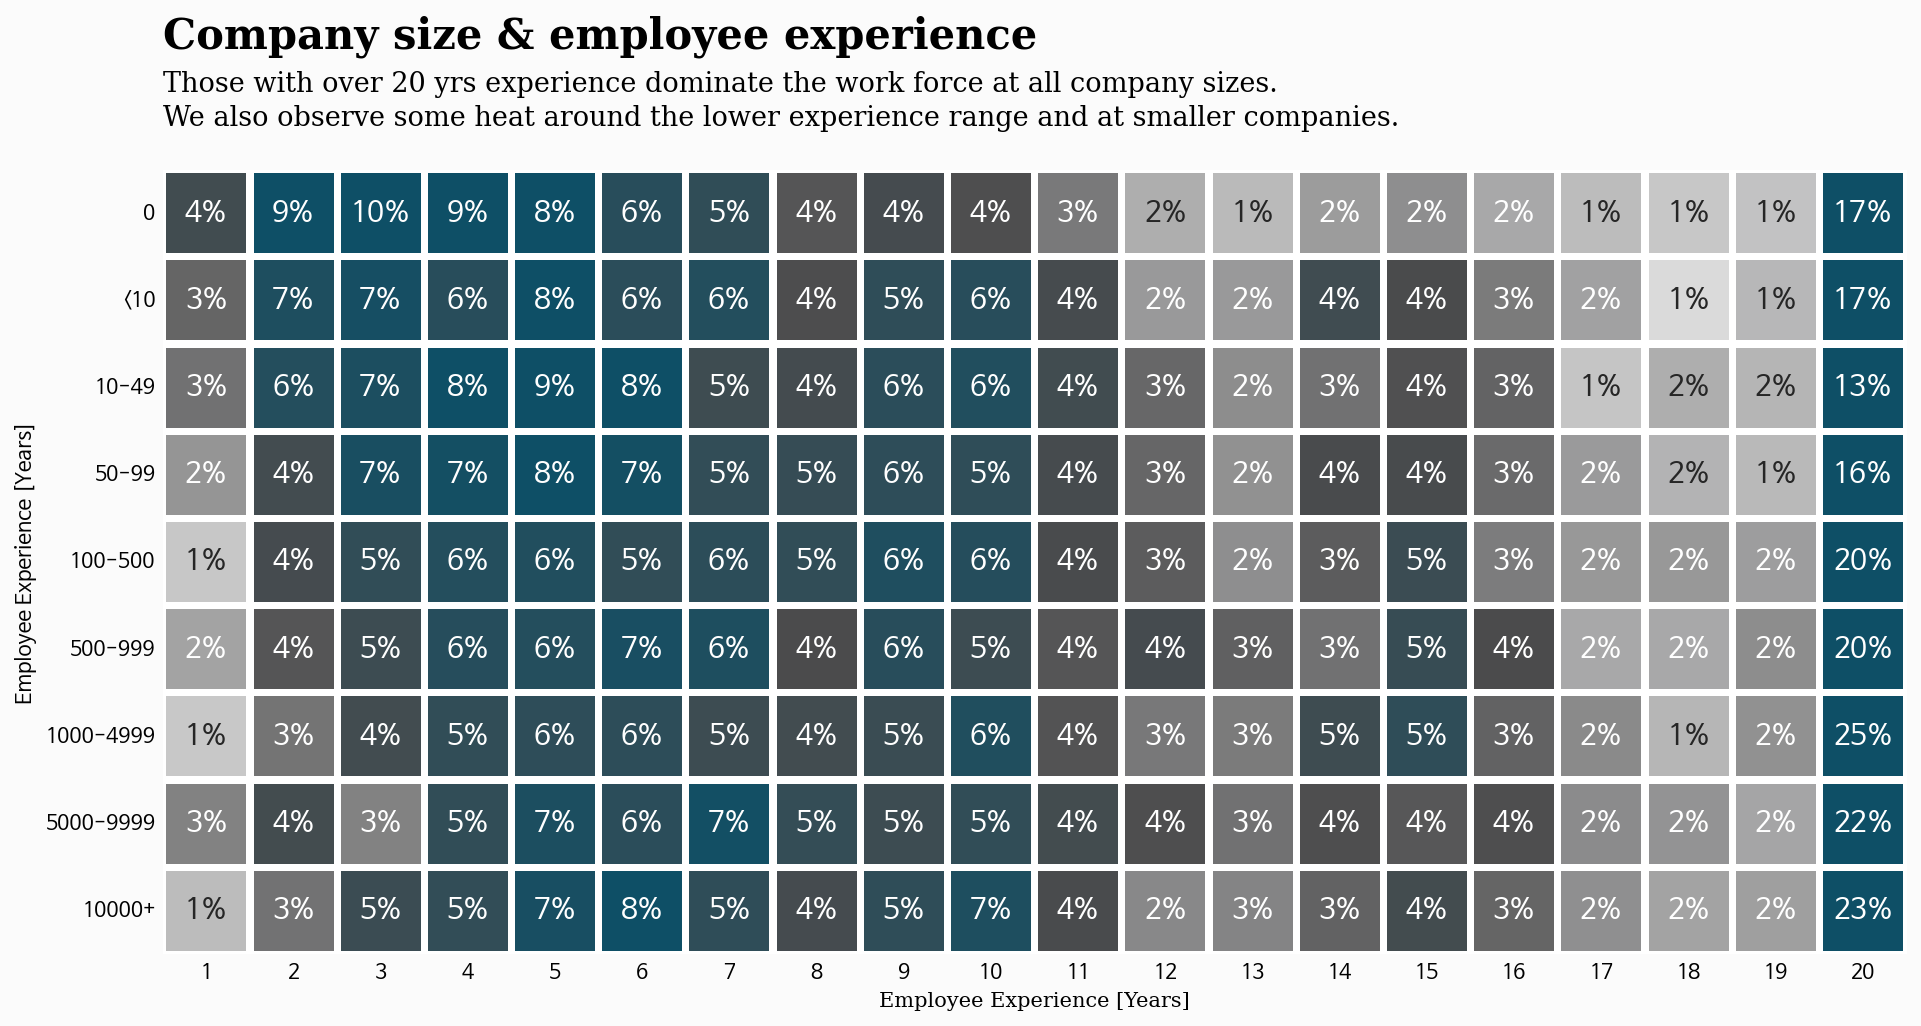

In [ ]:
import matplotlib
pv_gen_size = pd.pivot_table(aug_train, values='count',index=['gender'],columns=['company_size'],aggfunc=np.sum).loc[gender_order, size_order]
ct_gen_size = pd.crosstab(aug_train['company_size'],aug_train['experience'], normalize='index').loc[size_order,exp_yrs_order_2]


fig = plt.figure(figsize=(15,10), dpi=150) 
fig.patch.set_facecolor(background_color)
gs = fig.add_gridspec(2, 1)
gs.update(wspace=0, hspace=-0.09)
ax0 = fig.add_subplot(gs[:,:])

colors = ["#fbfbfb", "#4b4b4c","#0e4f66"]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

sns.heatmap(ax=ax0, data=ct_gen_size, linewidths=.1, vmin=0, vmax=0.075,
            square=True, cbar=False, cmap=colormap,linewidth=3, annot=True, fmt='1.0%',annot_kws={"fontsize":14})

 
ax0.set_facecolor(background_color) 
ax0.set_xlabel("Employee Experience [Years]",fontfamily='serif',fontsize=10)
ax0.set_ylabel("Employee Experience [Years]")

for s in ["top","right","left"]:
    ax0.spines[s].set_visible(False)

    
ax0.text(0, -1.4, 
         'Company size & employee experience', 
         fontsize=20, 
         fontweight='bold', 
         fontfamily='serif',
        )

ax0.text(0, -0.9, 
         'Those with over 20 yrs experience dominate the work force at all company sizes.', 
         fontsize=13, 
         fontweight='light', 
         fontfamily='serif',
        )
ax0.text(0, -0.5, 
         'We also observe some heat around the lower experience range and at smaller companies.', 
         fontsize=13, 
         fontweight='light', 
         fontfamily='serif',
        )

ax0.tick_params(axis=u'both', which=u'both',length=0)
plt.show()

In [ ]:
# 특성별 정보 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   gender                  14650 non-null  object 
 2   enrolled_university     18772 non-null  object 
 3   education_level         18698 non-null  object 
 4   major_discipline        16345 non-null  object 
 5   training_hours          19158 non-null  int64  
 6   relevent_experience     19158 non-null  object 
 7   experience              19093 non-null  object 
 8   last_new_job            18735 non-null  object 
 9   city                    19158 non-null  object 
 10  city_development_index  19158 non-null  float64
 11  company_type            13018 non-null  object 
 12  company_size            13220 non-null  object 
 13  target                  19158 non-null  int64  
dtypes: float64(1), int64(3), object(10)
me

In [ ]:
# 특성별 결측치 확인
train.isna().sum()

enrollee_id                  0
gender                    4508
enrolled_university        386
education_level            460
major_discipline          2813
training_hours               0
relevent_experience          0
experience                  65
last_new_job               423
city                         0
city_development_index       0
company_type              6140
company_size              5938
target                       0
dtype: int64

>> ### **3.1_3 Numeric Variable Missing Value Processing**
- MICE를 통해 결측값 대치
- *(enrolled_university,　education level,　experience,　last new job,　company size)*

---

In [ ]:
# 3.1_2에서 Mapping을 위해 만든 dictionary를 활용

train_mice = train_map.copy()
mice_imputer = IterativeImputer()

train_mice['enrolled_university']= mice_imputer.fit_transform(train_map[['enrolled_university']])
train_mice['enrolled_university'] = round(train_mice['enrolled_university'])

train_mice['education_level'] = mice_imputer.fit_transform(train_map[['education_level']])
train_mice['education_level'] = round(train_mice['education_level'])

train_mice['experience']= mice_imputer.fit_transform(train_map[['experience']])
train_mice['experience'] = round(train_mice['experience'])

train_mice['last_new_job']= mice_imputer.fit_transform(train_map[['last_new_job']])
train_mice['last_new_job'] = round(train_mice['last_new_job'])

train_mice['company_size']= mice_imputer.fit_transform(train_map[['company_size']])
train_mice['company_size'] = round(train_mice['company_size'])

train_mice.isna().sum()

enrollee_id                  0
gender                    4508
enrolled_university          0
education_level              0
major_discipline          2813
training_hours               0
relevent_experience          0
experience                   0
last_new_job                 0
city                         0
city_development_index       0
company_type              6140
company_size                 0
target                       0
dtype: int64

In [ ]:
# train_mice.to_csv('train_mice.csv', index=False)

>> ### **3.1_4 Categorical Variable Missing Value Processing**
- datawig 라이브러리를 활용해 결측값 대치
- *(major_discipline,　gender,　company_type)*

---

In [ ]:
# id는 고유의 수임이 확인 되었으므로 index로 사용하면 편할것으로 예상 / 아이디 순서대로 나열
train_mice = train_mice.sort_values('enrollee_id')
train_mice = train_mice.set_index('enrollee_id')

In [ ]:
# datawig는 한번에 하나의 column에 대한 결측값 처리가 가능
# 결측값이 있는 범주형 변수(major_discipline, gender, company_type), 고유값 변수(city), 데이터누수 방지(target) 제거  
train_mice_num = train_mice[train_mice.columns.difference(['major_discipline', 'gender', 'company_type', 'city', 'target'])]

In [ ]:
# datawig로 결측값을 채울때 참고하는 columns는 object형이어야 하기에 변환 실행
train_mice_num2cat = train_mice_num[train_mice_num.columns.difference(["major_discipline"])].applymap(str)

In [ ]:
train_mice_num2cat = train_mice_num2cat[train_mice_num2cat.columns]

In [ ]:
# 결측값을 알고싶은 major_discipline 붙이기
df_major_na = pd.concat([train_mice_num2cat, train_mice['major_discipline']], axis=1)
df_major_na.head()

,city_development_index,company_size,education_level,enrolled_university,experience,last_new_job,relevent_experience,training_hours,major_discipline
enrollee_id,,,,,,,,,
1,0.92,3.0,1.0,0.0,2.0,5.0,0,150,NaN
2,0.92,7.0,4.0,0.0,15.0,2.0,0,128,STEM
4,0.92,2.0,3.0,0.0,9.0,0.0,0,13,STEM
5,0.855,0.0,3.0,0.0,10.0,4.0,1,12,STEM
7,0.897,3.0,3.0,2.0,13.0,4.0,1,18,STEM


In [ ]:
df_major_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19158 entries, 1 to 33380
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   city_development_index  19158 non-null  object
 1   company_size            19158 non-null  object
 2   education_level         19158 non-null  object
 3   enrolled_university     19158 non-null  object
 4   experience              19158 non-null  object
 5   last_new_job            19158 non-null  object
 6   relevent_experience     19158 non-null  object
 7   training_hours          19158 non-null  object
 8   major_discipline        16345 non-null  object
dtypes: object(9)
memory usage: 1.5+ MB


In [ ]:
df_major_na[df_major_na['major_discipline'].notnull()]

In [ ]:
# df_train_major, df_test_major = datawig.utils.random_split(df_major_na, split_ratios=[0.7, 0.3])
# #Initialize a SimpleImputer model
# imputer = datawig.SimpleImputer(
#     input_columns = train_mice_num2cat.columns.to_list(), # column(s) containing information about the column we want to impute
#     output_column = 'major_discipline', # the column we'd like to impute values for
#     output_path = 'imputer_model' # stores model data and metrics
#     )

# #Fit an imputer model on the train data
# imputer.fit(train_df=df_train_major, num_epochs=50)

# #Impute missing values and return original dataframe with predictions
# imputed = imputer.predict(df_test_major)

In [ ]:
train_mice_num2cat.columns.to_list()[0:]

['city_development_index',
 'company_size',
 'education_level',
 'enrolled_university',
 'experience',
 'last_new_job',
 'relevent_experience',
 'training_hours']

In [ ]:
train_mice_num2cat.columns.to_list()

['city_development_index',
 'company_size',
 'education_level',
 'enrolled_university',
 'experience',
 'last_new_job',
 'relevent_experience',
 'training_hours']

In [ ]:
df_train_major, df_test_major = datawig.utils.random_split(df_major_na, split_ratios=[0.7, 0.3])

imputer = datawig.SimpleImputer(
    input_columns=train_mice_num2cat.columns.to_list(), # impute에 사용할 컬럼을 지정해줄수 있다. 컬럼 '3'은 제외시켰다.
    output_column= 'major_discipline', # 컬럼 0의 missing value를 채운다.
    )
imputer.fit(train_df=df_train_major, num_epochs=50)
df_null_only = df_test_major[df_test_major['major_discipline'].isnull()]
np_imputed = imputer.predict(df_null_only)
df_imputed = pd.DataFrame(np_imputed)

# 변환 후 데이터 확인
df_imputed.head(10)

,city_development_index,company_size,education_level,enrolled_university,experience,last_new_job,relevent_experience,training_hours,major_discipline,major_discipline_imputed,major_discipline_imputed_proba
enrollee_id,,,,,,,,,,,
13199,0.92,3.0,1.0,2.0,3.0,4.0,0,54,NaN,STEM,0.838831
29719,0.939,7.0,1.0,0.0,6.0,4.0,1,48,NaN,STEM,0.928592
6254,0.92,3.0,2.0,0.0,5.0,5.0,0,94,NaN,STEM,0.719892
4753,0.855,3.0,1.0,2.0,2.0,5.0,0,198,NaN,STEM,0.914126
33235,0.624,3.0,1.0,2.0,4.0,5.0,0,74,NaN,STEM,0.960649
22304,0.915,3.0,1.0,2.0,2.0,4.0,0,34,NaN,STEM,0.877089
30337,0.624,3.0,1.0,2.0,3.0,5.0,0,151,NaN,STEM,0.949170
26829,0.738,3.0,1.0,0.0,21.0,4.0,0,56,NaN,STEM,0.816801
11988,0.848,3.0,1.0,0.0,4.0,5.0,0,16,NaN,STEM,0.839338


In [ ]:
df = datawig.utils.generate_df_string( num_samples=200, 
                                       data_column_name='sentences', 
                                       label_column_name='label')

df_train_major, df_test_major = datawig.utils.random_split(df_major_na, split_ratios=[0.7, 0.3])


#Initialize a SimpleImputer model
imputer = datawig.SimpleImputer(
    input_columns= train_mice_num2cat.columns.to_list(), # column(s) containing information about the column we want to impute
    output_column= 'major_discipline', # the column we'd like to impute values for
    output_path = 'imputer_model' # stores model data and metrics
    )

#Fit an imputer model on the train data
imputer.fit(train_df=df_train_major)

#Impute missing values and return original dataframe with predictions
imputed = imputer.predict(df_test_major)

TypeError: ignored

In [ ]:
impute_object = datawig.utils.generate_df_string( num_samples=200, 
                                       data_column_name='sentences', 
                                       label_column_name='label')


In [ ]:
df_train_major, df_test_major = datawig.utils.random_split(impute_object, split_ratios=[0.7, 0.3])

#Initialize a SimpleImputer model
imputer = datawig.SimpleImputer(
    input_columns= train_mice_num2cat.columns.to_list(), # column(s) containing information about the column we want to impute
    output_column='major_discipline', # the column we'd like to impute values for
    output_path = 'imputer_model' # stores model data and metrics
    )

#Fit an imputer model on the train data
imputer.fit(train_df=df_train_major)

#Impute missing values and return original dataframe with predictions
imputed = imputer.predict(df_test_major)

imputed.head()

KeyError: ignored

In [ ]:
impute_object

,sentences,label
0,XeOlL gfNZG aFiQz kV1Ox WHYKQ GT8Qw,aFiQz
1,hQshR v0RrM LUPNI 1ym9K ce2V3 iPEJ4,1ym9K
2,CyU0O lToE5 1ym9K 3o8jl jyZ3P FeDKD,1ym9K
3,4lqfv LSUWH 1ym9K THuu6 lnK4M 9BXGf,1ym9K
4,GT8Qw 1ym9K j3VnT hQshR me9Gl Ylkqq,1ym9K
...,...,...
195,0erzX LXkja br7om 1ym9K 3o8jl lnK4M,1ym9K
196,Ylkqq hQVIY iPEJ4 aFiQz xC9Jn 7Ctpc,aFiQz
197,iPEJ4 r3P32 LUPNI vbFEm 1ym9K zdJLb,1ym9K
198,GT8Qw CheMY dgSYM BLyoD o6ZAP 1ym9K,1ym9K


In [ ]:
imputed['major_discipline_imputed'].unique()

array(['-1.0'], dtype=object)

In [ ]:
############################

In [ ]:
df_merge4 = pd.merge(df1,df3, how = 'left', on="이름")

In [ ]:
df_major_na[df_major_na['major_discipline'].notnull()]

In [ ]:
s_info.merge(s_2016_3, left_on='Symbol', right_index=True)

In [ ]:
# 결측값을 알고싶은 gender 붙이기
df_gender_na = pd.concat([imputed, train_mice['gender']], axis=1)
df_gender_na.head()

In [ ]:
train_mice_num.columns.to_list().remove('major_discipline')

In [ ]:
# enrollee_id 중복값이 없음을 확인
train.enrollee_id.value_counts().max()
# id는 고유의 수임이 확인 되었으므로 index로 사용 / 아이디 순서대로 나열
train = train.sort_values('enrollee_id')
# enrollee_id를 index로 지정 완료
train = train.set_index('enrollee_id')
train.head()



>> ### 3.1_1 enrollee_id

---












gender,　enrolled_university,　major_discipline,　company_type              

In [ ]:
# 중복값이 없음을 확인
train.enrollee_id.value_counts().max()

In [ ]:
# id는 고유의 수임이 확인 되었으므로 index로 사용하면 편할것으로 예상 / 아이디 순서대로 나열
train = train.sort_values('enrollee_id')

In [ ]:
# enrollee_id를 index로 지정 완료
train = train.set_index('enrollee_id')
train.head()

>> ### 3.1_2 city, city_development_index Wrangling


---




In [ ]:
# city column은 city_code형태로 되어있으며, 이는 도시를 code화 시킨 고유값임을 알 수 있음. / 오탈자가 없어 따로 핸들링하지 않음
train.city.unique()

In [ ]:
# city_development_index의 최소, 최대값을 확인하고, 이에따라 0.1단위로 등급을 부여
print(train.city_development_index.max())
print(train.city_development_index.min())

train["city_development_index"] = round(train["city_development_index"]*10,0)

train.CDI = train.CDI.astype(int)
train.CDI.unique()

train.head()

In [ ]:
train.head()


>> ### 3.1_3 Gender

---

In [ ]:
train.gender.unique()

In [ ]:
train.gender = train.gender.fillna(value = 'No Data')
train.gender.unique()

>> ### 3.1_4 Relevent_Experience
---

In [ ]:
# 사실상 boolean으로, T,F로 분류
train.relevent_experience.unique()

In [ ]:
train.relevent_experience = train.relevent_experience.replace("No relevent experience", 'F')
train.relevent_experience = train.relevent_experience.replace("Has relevent experience", 'T')
train.relevent_experience.unique()

>> ### 3.1_5 Enrolled_University

---

In [ ]:
train.enrolled_university.unique()

In [ ]:
train.enrolled_university = train.enrolled_university.replace("no_enrollment", "Not applicable")
train.enrolled_university = train.enrolled_university.fillna(value = 'No Data')
train.enrolled_university.unique()

>> ### 3.1_6 Education_Level

---



In [ ]:
train.education_level.unique()

In [ ]:
train.education_level = train.education_level.fillna(value = 'No Data')
train.education_level.unique()

>> ### 3.1_7 Major_Discipline

---

In [ ]:
train.major_discipline.unique()

In [ ]:
train.major_discipline = train.major_discipline.fillna(value = 'No Data')
train.major_discipline.unique()

>> ### 3.1_8 Experience
---

In [ ]:
train.experience.unique()

In [ ]:
train.experience = train.experience.replace(">20", "21")
train.experience = train.experience.replace("<1", "0")
train.experience = train.experience.fillna(value = "999")
train.experience = train.experience.apply(pd.to_numeric)
train.experience.unique()

>> ### 3.1_9 Company_Size

---

In [ ]:
train.company_size.unique()

In [ ]:
train.company_size = train.company_size.replace("<10", "9")
train.company_size = train.company_size.replace("10/49", "49")
train.company_size = train.company_size.replace("50-99", "99")
train.company_size = train.company_size.replace("100-500", "499")
train.company_size = train.company_size.replace("500-999", "999")
train.company_size = train.company_size.replace("1000-4999", "4999")
train.company_size = train.company_size.replace("5000-9999", "9999")
train.company_size = train.company_size.replace("10000+", "10000")
train.company_size = train.company_size.fillna(value = '0')
train.company_size = train.company_size.apply(pd.to_numeric)
train.company_size.unique()

>> ### 3.1_10 Company_Type
---

In [ ]:
train.company_type.unique()

In [ ]:
train.company_type = train.company_type.fillna(value = 'No Data')
train.company_type.unique()

>> ### 3.1_11 Last_New_Job

---

In [ ]:
train.last_new_job.unique()

In [ ]:
train.last_new_job = train.last_new_job.replace("never", 0)
train.last_new_job = train.last_new_job.replace(">4", 5)
train.last_new_job = train.last_new_job.fillna(value = 999)
train.last_new_job = train.last_new_job.apply(pd.to_numeric)
train.last_new_job.unique()

>> ### 3.1_12 Final Confirmation

---

In [ ]:
# 데이터수의 변화가 없음을 확인
train.shape

In [ ]:
train_copy = train

In [ ]:
# train = train.rename(columns={'city_development_index':'CDI'})

In [ ]:
# column순서 변경
train=train[['CDI','gender', 'relevent_experience',
       'enrolled_university', 'education_level', 'major_discipline',
       'experience', 'company_size', 'company_type', 'last_new_job',
       'training_hours', 'target']]
train.head()

In [ ]:
train.target = train.target.astype(int)

In [ ]:
train.info()



> ## 3.2 Encoding

---







> ### 3.2_1 Model performance after only Encoding(before SMOTE)

---





In [ ]:
sns.displot(train.target)

In [ ]:
target = 'target'
feature = train.drop([target], axis = 1).columns

In [ ]:
train_base, test_base = train_test_split(train, train_size = 0.8, test_size = 0.2,
                              stratify = train[target], random_state = 2)

In [ ]:
X_train = train_base[feature]
y_train = train_base[target]
X_test = test_base[feature]
y_test = test_base[target]

In [ ]:
le = preprocessing.LabelEncoder()
X_train = X_train.apply(le.fit_transform)
X_test = X_test.apply(le.fit_transform)

In [ ]:
model = XGBClassifier(
    n_estimators=200,
    random_state=42,
    max_depth=7,
    learning_rate=0.1,
    n_jobs=-1
)

In [ ]:
eval_set = [(X_train, y_train), 
            (X_test, y_test)]

In [ ]:
model.fit(X_train, y_train, 
          eval_set=eval_set,
          eval_metric='error',
          early_stopping_rounds=50
         )

In [ ]:
y_test_pred = model.predict(X_test)
print("score:",model.score(X_test,y_test))
print("F1_score:",f1_score(y_test, y_test_pred))

In [ ]:
train.head()



> ## 3.3 Data Balancing

---





In [ ]:
train_enc = train.apply(le.fit_transform)

In [ ]:
map = le.fit_transform(train['enrolled_university'].values)

In [ ]:
map2 = le.inverse_transform(map)

In [ ]:
map

In [ ]:
map2

In [ ]:
np.unique(map)

In [ ]:
np.unique(map2)

In [ ]:
le.inverse_transform(map)

In [ ]:
train_enc.head()

In [ ]:
X_train_enc = train_enc[feature]
y_train_enc = train_enc[target]

In [ ]:
sns.displot(target)

In [ ]:
feature, target = SMOTE(random_state = 42).fit_resample(X_train_enc, y_train_enc)

In [ ]:
feature.shape # After SMOTE

In [ ]:
sns.displot(target)

In [ ]:
feature

#4. Modeling


---





> ## 4.1 Baseline Model Select










In [ ]:
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.2,
                                                    stratify=target, random_state = 42)

> > ### 4.1_1 RandomForest Model

---



In [ ]:
model1 = RandomForestClassifier(random_state = 2)
model1.fit(X_train, y_train)

In [ ]:
y_test_pred = model1.predict(X_test)
print("model1_score:",model1.score(X_test,y_test))
print("model1_F1_score:",f1_score(y_test, y_test_pred))
print('model1_AUC score:',roc_auc_score(y_test, y_test_pred))

In [ ]:
fig, ax = plt.subplots(figsize=(15, 7))
pcm = plot_confusion_matrix(model1, X_test, y_test,
                            cmap=plt.cm.Blues,
                            ax=ax);
plt.title(f'Confusion matrix, n = {len(y_test)}', fontsize=15)
plt.show()

> > ### 4.1_2 Gradient Boost Model

---



In [ ]:
model2 = XGBClassifier(
    n_estimators=130,
    random_state=42,
    max_depth=10,
    learning_rate=0.1,
    n_jobs=-1
)

In [ ]:
eval_set = [(X_train, y_train), 
            (X_test, y_test)]

In [ ]:
model2.fit(X_train, y_train, 
          eval_set=eval_set,
          eval_metric='error',
          early_stopping_rounds=50
         )

In [ ]:
y_test_pred = model2.predict(X_test)
print("model2_score:",model2.score(X_test,y_test))
print("model2_F1_score:",f1_score(y_test, y_test_pred))
print('model2_AUC score:',roc_auc_score(y_test, y_test_pred))
# model2의 지표가 model1보다 좋으므로, baseline model은 Gradient Boost Model인 model2이다.

In [ ]:
fig, ax = plt.subplots(figsize=(15, 7))
pcm = plot_confusion_matrix(model2, X_test, y_test,
                            cmap=plt.cm.Blues,
                            ax=ax);
plt.title(f'Confusion matrix, n = {len(y_test)}', fontsize=15)

> ## 4.2 Hyperparameter Tuning_(Gradient Boost Model / Using RandomizedSearch)

In [ ]:
model2.get_params().keys()

In [ ]:
clf = XGBClassifier()

dists = {
        'silent': [False], # 동작 메시지를 프린트하지 않음
        'max_depth': randint(2,20), # 트리의 최대 깊이
        'learning_rate': [0.05, 0.1, 0.2, 0,3], # 학습률
        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0], # 데이터의 샘플링 비율
        'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], # 각 노드 depth 마다 사용할 칼럼(Feature)의 비율
        'colsample_bylevel': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], # 각 트리 depth 마다 사용할 칼럼(Feature)의 비율
        'min_child_weight': [0.5, 1.0, 3.0, 5.0, 7.0, 10.0], # 관측에서 요구되는 최소 가중치의 합 / over-fitting vs under-fitting을 조정하기 위한 파라미터
        'gamma': [0, 0.25, 0.5, 1.0], # 분할을 수행하는데 필요한 최소 손실 감소를 지정한다. / Overfitting 방지에 좋으나 너무 높으면 underfitting 이 생길 수가 있다.(알고리즘을 보수적으로 만듬)
        'reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0], # 가중치에 대한 L2 정규화 용어
        'n_estimators': [100,200,300,400,500] # 모델 객체 지정
}

fit_dists = {'eval_metric': 'mlogloss',
              'early_stopping_rounds': 50,
              'eval_set': [(X_test, y_test_pred)]}

rs_clf = RandomizedSearchCV(clf, dists, n_iter=10, # n_iter : 파라미터 검색 횟수
                            n_jobs=-1, verbose=2, cv=10, # cv : 교차검증 시 fold 갯수
                            scoring='f1', refit=False, random_state=42)

In [ ]:
# rs_clf.fit(X_train, y_train)
# best_score = rs_clf.best_score_
# best_params = rs_clf.best_params_
# print("Best score: ",best_score)
# print("Best params: ")
# for param_name in sorted(best_params.keys()):
#   print('%s: %r' % (param_name, best_params[param_name]))

In [ ]:
# Best params: 
# colsample_bylevel: 1.0
# colsample_bytree: 0.5
# gamma: 1.0
# learning_rate: 0.05
# max_depth: 15
# min_child_weight: 1.0
# n_estimators: 400
# reg_lambda: 0.1
# silent: False
# subsample: 0.6

In [ ]:
model2 = XGBClassifier(
    colsample_bylevel = 1.0,
    colsample_bytree = 0.5,
    gamma = 1.0,
    learning_rate = 0.05,
    max_depth = 15,
    min_child_weight = 1.0,
    n_estimators = 400,
    reg_lambda = 0.1,
    silent = False,
    subsample = 0.6,
    n_jobs=-1
)

In [ ]:
eval_set2 = [(X_train, y_train),
             (X_test, y_test)]

In [ ]:
model2.fit(X_train, y_train, 
          eval_set=eval_set2,
          eval_metric='error',
          early_stopping_rounds=50
         )

In [ ]:
y_test_pred = model2.predict(X_test)
print("mainmodel_score:",model2.score(X_test,y_test))
print("mainmodel_F1_score:",f1_score(y_test, y_test_pred))
print('mainmodel_AUC score:',roc_auc_score(y_test, y_test_pred))

In [ ]:
threshold = 0.5

y_pred_proba = model2.predict_proba(X_test)[:, 1]
pred_test = y_pred_proba > threshold
  
print(classification_report(y_test, pred_test))

In [ ]:
# roc_curve(타겟값, prob of 1)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

roc = pd.DataFrame({
    'FPR(Fall-out)': fpr, 
    'TPRate(Recall)': tpr, 
    'Threshold': thresholds
})
roc

In [ ]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

print('threshold:', optimal_threshold)

In [ ]:
threshold = optimal_threshold
y_pred_proba = model2.predict_proba(X_test)[:, 1]
pred_test = y_pred_proba > threshold

print(classification_report(y_test, pred_test))

In [ ]:
print("score:",model2.score(X_test,pred_test))
print("F1_score:",f1_score(y_test, pred_test))
print('pipe_AUC score:',roc_auc_score(y_test, pred_test))

In [ ]:
fig, ax = plt.subplots(figsize=(15, 7))
pcm = plot_confusion_matrix(model2, X_test, pred_test,
                            cmap=plt.cm.Blues,
                            ax=ax);
plt.title(f'Confusion matrix, n = {len(y_test)}', fontsize=15)
plt.show()

#5. Analyze

---

In [ ]:
import shap
explainer = shap.TreeExplainer(model2)
shap_values = explainer.shap_values(X_test.iloc[:])
shap.summary_plot(shap_values, X_test.iloc[:], plot_type="bar")
# 도시개발지수, 직종경험연차, 회사규모(회사에 종사중인 사원 수) 이하 순

In [ ]:
features = X_test.columns
feature = 'experience'
pdp_dist = pdp.pdp_isolate(model=model2, dataset=X_test, model_features=features, feature=feature)
pdp.pdp_plot(pdp_dist, feature);
# 직종경험연차가 1년차부터 3년차까지 이직희망율이 비교적 높았으며, 이후 감소함을 알 수 있음
# 이로인해 1-3년차의 주니어 분석가들은 사회 초년 경험이 쌓이면 보다 나은 대우를 받기 위해 이직하려 한다는 것을 추측할 수 있으며,
# 연차가 10년 이상일 경우부터 한 직장에 정착하려 한다는 것을 추측할 수 있음.

In [ ]:
features = X_test.columns
feature = 'CDI'
pdp_dist = pdp.pdp_isolate(model=model2, dataset=X_test, model_features=features, feature=feature)
pdp.pdp_plot(pdp_dist, feature);
# 도시 개발지수가 0.6-0.7(CDI 2번 이하)미만인 곳에 종사하는 사람들의 이직희망율이 양수의 영역에서 그려지고 있음.
# 반대로 0.7-0.8 이상(CDI2번 이상)의 개발지수를 보이는 도시에서 종사하는 사람들은 이직 희망율이 감소하는것을 볼 수 있음
# 또한, 도시개발지수가 0.6미만인 도시보다 0.6이상 0.7이하(CDI 2번)인 도시에서 이직 희망율이 더 높은것을 보면,
# 0.7이상(CDI 2번 이상)의 도시에서부터 업무환경이 크게 차이날것이라고 추측해볼 수 있다.

In [ ]:
# XGBoost 시각화
from xgboost import plot_tree 
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 100,150

model3 = XGBClassifier(
    colsample_bylevel = 1.0,
    colsample_bytree = 0.5,
    gamma = 1.0,
    learning_rate = 0.05,
    max_depth = 3,
    min_child_weight = 1.0,
    n_estimators = 500,
    reg_lambda = 0.1,
    silent = False,
    subsample = 0.6,
    n_jobs=-1
)

model3.fit(X_train, y_train, 
          eval_set=eval_set2,
          eval_metric='error',
          early_stopping_rounds=50
         )

plt.figure(figsize=(12,12))  # set plot size (denoted in inches)
plot_tree(model3)
plt.show()


## 기타 시도 (숨김처리)

In [ ]:
#@title
# train_raw.head()

In [ ]:
#@title
# train_group = train_3.groupby('target').get_group(1.0)

In [ ]:
#@title
# train_raw_group = train_3.groupby(['city','city_level'], as_index=False).size()
# train_raw_group = train_raw_group.rename(columns={'size':'count'}).reset_index(drop=False)
# train_raw_group = train_raw_group.rename(columns={'city_level':'CDI'}).reset_index(drop=False)
# train_raw_group = train_raw_group.sort_values(by = 'count', ascending=False).head(20).loc[:,'city':]

In [ ]:
#@title
# plt.figure(figsize = (20,10))
# sns.barplot(data = train_raw_group, x = 'city', y = 'count', hue = 'CDI', palette=("coolwarm"), dodge=False)

In [ ]:
#@title
# train_raw_group2 = train_3.groupby(['city','city_level','target'], as_index=False).size()
# train_raw_group2 = train_raw_group2.rename(columns={'size':'count'})
# train_raw_group2 = train_raw_group2.rename(columns={'city_level':'CDI'})
# train_raw_group2 = train_raw_group2.sort_values(by = 'count', ascending=False).head(237).loc[:,'city':]

In [ ]:
#@title
# train_raw_group2.head()

In [ ]:
#@title
# train_raw_group.head(20).city

In [ ]:
#@title
# train_raw_group2['sum'] = train_raw_group2.groupby('city')['count'].cumsum(axis=0)
# train_raw_group2['norm_count'] = train_raw_group2.groupby('city')['count'].apply(lambda x : x/sum(x))

In [ ]:
#@title
# train_raw_group2.sort_values(by='CDI', ascending=False)

In [ ]:
#@title
# "city_103|city_21|city_16|city_114|city_160|city_136|city_67|city_75|city_102|city_104"#|city_73|city_100|city_71|city_11|city_90|city_61|city_28|city_23|city_65|city_36
# train_raw_group2 = train_raw_group2.loc[train_raw_group2.city.str.contains("city_103|city_21|city_16|city_114|city_160|city_136|city_67|city_75|city_102|city_104", na=False)]

In [ ]:
#@title
# train_raw_group2

In [ ]:
#@title
# plt.figure(figsize = (20, 10))
# sns.barplot(x='city', y='count', hue='target', palette = 'coolwarm', data=train_raw_group2)
# plt.title('Stacked Bar Chart by Seaborn', fontsize='20')
# plt.show()